# Reconstrucción Planetaria

Usando los datos proporcionados por la libreria astroquery, se buscara obtener por medio de ajuste de curvas con minimos cuadrados los paramentros orbitales de los planetas del sistema solar.

Por la 1° ley de Kepler, sabemos que los planetas describen orbitas elipticas, asi podemos describir la distancia de un planeta al Sol con la siguiente ecuación:

\begin{equation}
\ r(θ) = \frac{a(1-e^2)}{1+e\cos(θ)}
\end{equation}

Donde $θ$ es la posición ángular del planeta en su orbita, $a$ es el semieje mayor de la orbita y $e$ es la excentricidad de la orbita.

Con estos parametros es posible dar un descripción bastante completa de la orbita de un planeta y apartir de esta determinar otros datos relevantes.

Usando la función Horizons de astroquery podemos generar los datos de posición de todos los planetas del sistema solar, para todos los planetas, tomaremos sus datos de distancia al sol y ángulo en su orbita para un intervalo de tiempo dado.

La idea usar el ajuste de curva por minimos cuadrados para determinar los parametros de las orbitas. El método de mínimos cuadrados es una técnica utilizada para encontrar los parámetros de un modelo matemático que minimizan la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo. Este método es comúnmente utilizado en el ajuste de curvas y regresión, donde se busca encontrar la mejor relación entre variables. Este sigue los siguientes pasos:

1. **Definición del Modelo:**
    Comienza con la elección de un modelo matemático que describe la relación entre las variables. En el contexto del ajuste de curvas, esto podría ser una función que representa la forma de los datos. En nuestro caso el modelo de Kepler para las orbitas planetarias

2. **Función de Ajuste:**
    Define una función que representa la discrepancia entre los valores observados y los valores predichos por el modelo. Esta función se conoce como la función de ajuste o de error. Usaremos el mismo modelo de Kepleer como función ajuste

3. **Suma de Cuadrados de Errores (SSE):**
    Calcula la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo. La fórmula típica es $SSE = Σ(y_i - f(x_i))^2$, donde $y_i$ son los valores observados, $f(x_i)$ son los valores predichos y la suma es sobre todos los puntos de datos.

4. **Minimización de la SSE:**
    Ajusta los parámetros del modelo para minimizar la suma de cuadrados de errores. Esto implica derivar la función de ajuste con respecto a los parámetros y establecer las derivadas a cero para encontrar los valores óptimos.

5. **Solución Analítica o Numérica:**
    Encuentra soluciones analíticas si es posible o utiliza métodos numéricos como el método de Newton-Raphson o el gradiente descendente para encontrar los valores óptimos de los parámetros.

Para este problema, usaremos la función scipy.optimize.curve_fit, la cual hace un ajuste de curva por medio de minimos cuadrados dada un función y sus parametros.

Ya obtenidos los parametros para las orbitas de los planetras del sistema solar, graficaremos las orbitas con estos y los compararemos con los datos reales.


In [ ]:
!pip install astroquery
from astroquery.jplhorizons import Horizons
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [ ]:
# Definimos nuestra función modelo, en este caso

def distancia_radial(theta, a, e):

  thetha = np.deg2rad(theta)
  omega = np.deg2rad(theta)

  return a * (1 - e**2) / (1 + e * np.cos(theta))

# Datos observacionales de planetas en sistema solar y calculo de parametros

In [ ]:
mercury = Horizons(id= '199',
               location= '@sun',
               epochs={'start':'2024-01-01', 'stop':'2024-12-31',
                       'step':'1d'})

eph_mercury = mercury.ephemerides()

In [ ]:
params_mercury, cv_mercury = sc.optimize.curve_fit(distancia_radial, np.radians(eph_mercury['EclLon']), eph_mercury['r'])

print("Semieje mayor (UA) (a):", params_mercury[0])
print("Excentricidad (e):", abs(params_mercury[1]))

Semieje mayor (UA) (a): 0.3937983782064792
Excentricidad (e): 0.03626903442616124


In [ ]:
venus = Horizons(id= '299',
               location= '@sun',
               epochs={'start':'2024-01-01', 'stop':'2026-12-31',
                       'step':'1d'})

eph_venus = venus.ephemerides()

In [ ]:
params_venus, cv_venus = sc.optimize.curve_fit(distancia_radial, np.radians(eph_venus['EclLon']), eph_venus['r'])

print("Semieje mayor (UA) (a):", params_venus[0])
print("Excentricidad (e):", abs(params_venus[1]))

Semieje mayor (UA) (a): 0.7233687882356049
Excentricidad (e): 0.004424860258113225


In [ ]:
earth = Horizons(id='399',
                 location='@sun',
                 epochs={'start': '2023-11-24', 'stop': '2023-11-25',
                         'step': '1d'})


eph_earth = earth.ephemerides()

In [ ]:
params_earth, cv_earth = sc.optimize.curve_fit(distancia_radial, np.radians(eph_earth['EclLon']), eph_earth['r'])

print("Semieje mayor (UA) (a):", params_earth[0])
print("Excentricidad (e):", abs(params_earth[1]))

Semieje mayor (UA) (a): 0.9815741203212469
Excentricidad (e): 0.012604428374906261


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
mars = Horizons(id= '499',
               location= '@sun',
               epochs={'start':'2024-01-01', 'stop':'2024-12-31',
                       'step':'1d'})

eph_mars = mars.ephemerides()

In [ ]:
params_mars, cv_mars = sc.optimize.curve_fit(distancia_radial, np.radians(eph_mars['EclLon']), eph_mars['r'])

print("Semieje mayor (UA) (a):", params_mars[0])
print("Excentricidad (e):", abs(params_mars[1]))

Semieje mayor (UA) (a): 1.5388144455103492
Excentricidad (e): 0.09702567768667669


In [ ]:
jupyter = Horizons(id= '599',
               location= '@sun',
               epochs={'start':'2024-01-01', 'stop':'2024-12-31',
                       'step':'1d'})

eph_jupyter = jupyter.ephemerides()

In [ ]:
params_jupyter, cv_jupyter = sc.optimize.curve_fit(distancia_radial, np.radians(eph_jupyter['EclLon']), eph_jupyter['r'])

print("Semieje mayor (UA) (a):", params_jupyter[0])
print("Excentricidad (e):", abs(params_jupyter[1]))

Semieje mayor (UA) (a): 5.131509991798246
Excentricidad (e): 0.04011796256130627


In [ ]:
saturn = Horizons(id= '699',
               location= '@sun',
               epochs={'start':'2024-01-01', 'stop':'2034-12-31',
                       'step':'1d'})

eph_saturn = saturn.ephemerides()

In [ ]:
params_saturn, cv_saturn = sc.optimize.curve_fit(distancia_radial, np.radians(eph_saturn['EclLon']), eph_saturn['r'], maxfev = 1000000)

print("Semieje mayor (UA) (a):", params_saturn[0])
print("Excentricidad (e):", abs(params_saturn[1]))

Semieje mayor (UA) (a): 9.060199700792557
Excentricidad (e): 0.0415187981254928


In [ ]:
uranus = Horizons(id= '799',
               location= '@sun',
               epochs={'start':'2024-01-01', 'stop':'2034-12-31',
                       'step':'1d'})

eph_uranus = uranus.ephemerides()

In [ ]:
params_uranus, cv_urauns = sc.optimize.curve_fit(distancia_radial, np.radians(eph_uranus['EclLon']), eph_uranus['r'], maxfev = 1000000)

print("Semieje mayor (UA) (a):", params_uranus[0])
print("Excentricidad (e):", abs(params_uranus[1]))

Semieje mayor (UA) (a): 19.05057196592239
Excentricidad (e): 0.04885647212173195


In [ ]:
neptune = Horizons(id= '899',
               location= '@sun',
               epochs={'start':'2024-01-01', 'stop':'2064-12-31',
                       'step':'1d'})

eph_neptune = neptune.ephemerides()

In [ ]:
params_neptune, cv_neptune = sc.optimize.curve_fit(distancia_radial, np.radians(eph_neptune['EclLon']), eph_neptune['r'], maxfev = 1000000)

print("Semieje mayor (UA) (a):", params_neptune[0])
print("Excentricidad (e):", abs(params_neptune[1]))

Semieje mayor (UA) (a): 29.84224854280697
Excentricidad (e): 0.00018251165875053288


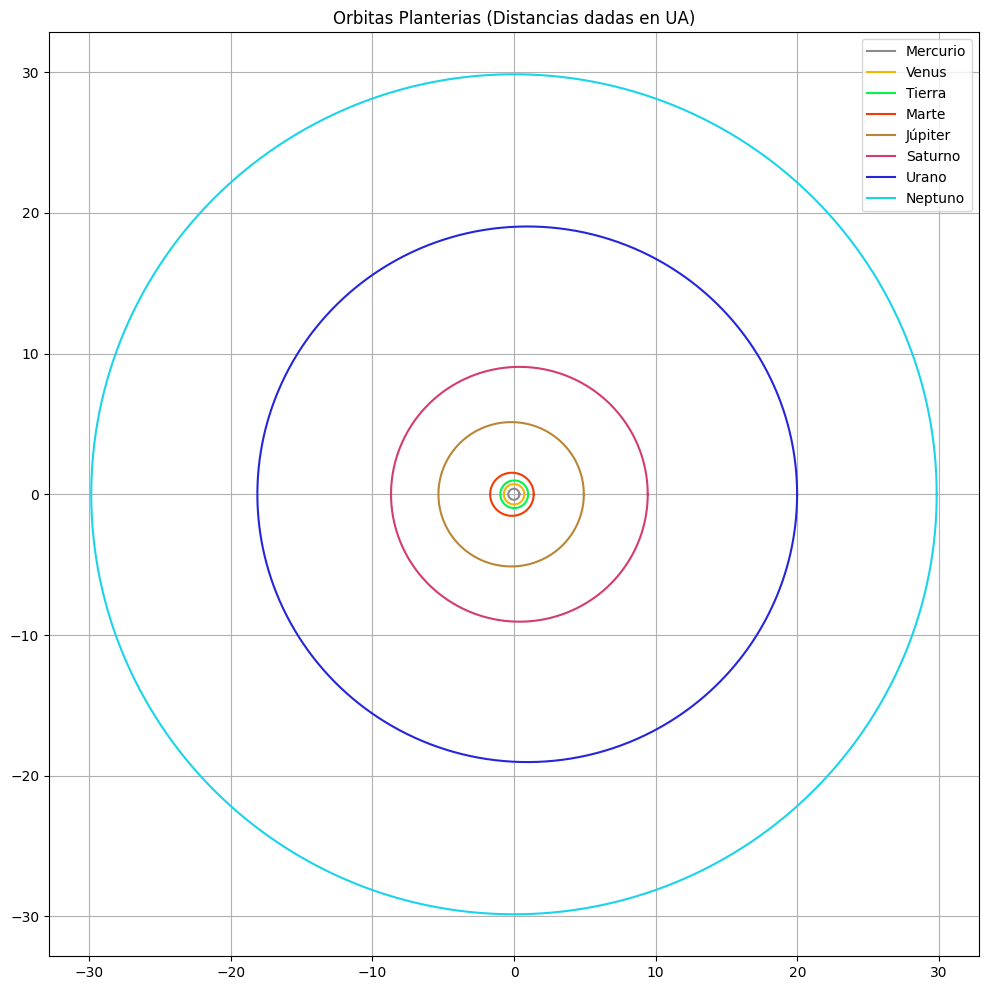

In [ ]:
semieje = np.array([params_mercury[0],params_venus[0],params_earth[0],params_mars[0],params_jupyter[0],params_saturn[0],params_uranus[0],params_neptune[0]])
excentricidad = np.array([params_mercury[1],params_venus[1],params_earth[1],params_mars[1],params_jupyter[1],params_saturn[1],params_uranus[1],params_neptune[1]])

# Función que devuelve las coordenadas cartesianas de la elipse
def elipse(theta, a, e):
    r = distancia_radial(theta,a,e)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Datos de semiejes y excentricidades

semieje = np.array([params_mercury[0],params_venus[0],params_earth[0],params_mars[0],params_jupyter[0],params_saturn[0],params_uranus[0],params_neptune[0]])
excentricidad = np.array([params_mercury[1],params_venus[1],params_earth[1],params_mars[1],params_jupyter[1],params_saturn[1],params_uranus[1],params_neptune[1]])

nombres_planetas = ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno']
colores = ['#8F8A8A','#F3B605','#05F34D','#F33B05','#B88736','#D33B72','#2426DA','#19D4EA']

fig, ax = plt.subplots(figsize=(12,12))

for i in range(0,len(semieje)):

    theta = np.linspace(0, 2 * np.pi, 1000)
    x, y = elipse(theta, semieje[i], excentricidad[i])
    ax.plot(x, y, label=nombres_planetas[i], color=colores[i])


ax.set_title("Orbitas Planterias (Distancias dadas en UA)")
ax.grid()
ax.legend()

plt.show()


# Analisis de error

In [ ]:
# Datos

semieje_real = np.array([0.38710, 0.72333, 1.00000, 1.52368, 5.20427, 9.58206, 19.21845, 30.05100])
excentricidad_real = np.array([0.20563, 0.00677, 0.01671, 0.09339, 0.04900, 0.05650, 0.04638, 0.00946])
nombres_planetas = ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno']
n = np.arange(1,9,1)

# Semiejes

plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.title("Comparación del cálculo del semieje")
plt.plot(n, semieje, linestyle='--', label='Semieje calculado por curve fit')
plt.scatter(n, semieje)
plt.plot(n, semieje_real, linestyle='--', label='Dato real de semieje')
plt.scatter(n, semieje_real)
plt.xlabel('Planetas')
plt.ylabel('Semieje mayor (UA)')
plt.xticks(n, nombres_planetas)
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Error del semieje para cada planeta")
plt.plot(n, (semieje_real - semieje), linestyle='--', label="Error")
plt.scatter(n, (semieje_real - semieje))
plt.xlabel('Planetas')
plt.ylabel('Error (UA)')
plt.xticks(n, nombres_planetas)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Excentricidad

plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.title("Comparación del cálculo de la excentricidad")
plt.plot(n, excentricidad, linestyle='--', label='Excentricidad calculada por curve fit')
plt.scatter(n, excentricidad)
plt.plot(n, excentricidad_real, linestyle='--', label='Dato real de excentricidad')
plt.scatter(n, excentricidad_real)
plt.xlabel('Planetas')
plt.ylabel('Excentricidad')
plt.xticks(n, nombres_planetas)
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Error de la excentricidad para cada planeta")
plt.plot(n, (excentricidad_real - excentricidad), linestyle='--', label="Error")
plt.scatter(n, (excentricidad_real - excentricidad))
plt.xlabel('Planetas')
plt.ylabel('Error')
plt.xticks(n, nombres_planetas)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Conclusiones

Se pudieron ver 2 situaciones a la hora de la reconstrucción de las orbitas: Para los planetas hasta Jupiter, se obtuvieron parametros de semieje y excentricidad muy cercanos a los reales, y utilizando unicamente los datos obtenidos por 1 año de observaciones, con la unica exepción de la excentricidad de Mercurio, los margenes de error son bastante pequeños, por debajo de 0.05 para la excentricidad y de 0.1 para el semieje mayor.

Para los planetas despues de Jupiter (Saturno, Urano y Neptuno) Tuvimos un error mucho mayor tanto para semieje y excentricidad, y estoy tomando datos en un intervalo temporal mucho mayor, mientras que para los otros planetas un intervalo de un año basto para obtener resultados bastante bueno, para Saturno y Urano se necesito un intervalo de 10 años de observación para siquiera tener convergencia en el método, el caso más extremo se dio con Neptuno, el cual requirio un intervalo de 40 años de observación para obtener sus parametros.

Esto muestra un limitación practica del método para encontrar los parametros de un orbita, para cuerpos con periodos orbirales grandes, se requieren un cantidad cada vez más grande de tiempo en orden de tener los datos suficientes para encontrar sus datos orbitales de forma correcta.

Para un cuerpo celeste del cual no dispongamos la forma de simular sus coordenadas a lo largo del tiempo, si este tiene un periodo orbital demasiado grande, este metodo se vuelve casi imposible de implementar para hallar sus parametros orbitales.
